# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

When these people fill up a form providing their email address or phone number, they are classified to be a lead.

The typical lead conversion rate at X education is around 30%. ```Goal of this case study is create a logisitic model which  increase the lead conversion to 80%```

## Step 1 : Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [2]:
# Importing all datasets
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Let's check the dimensions of the dataframe
lead.shape

(9240, 37)

In [4]:
# let's look at the statistical aspects of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
#replacing Select with Null value
lead.replace(to_replace = 'Select',value=np.nan,inplace=True)

In [8]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2).sort_values()

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Search                                            0.00
Newspaper Article                                 0.00
Last Notable Activity                             0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Numbe

## Step 2 : Data Prepration

### Dropping Columns with High Missing Percentage

```Missing Percentage Threshold for this case study =``` **`45%`** <br><br>
As seen from Missing percentage table above, the following columns have more 45% missing values. Hence dropping those columns

1. How did you hear about X Education
2. Lead Profile
3. Lead Quality
4. Asymmetrique Activity Index 
5. Asymmetrique Profile Index
6. Asymmetrique Profile Score
7. Asymmetrique Activity Score

In [9]:
columns_to_drop = ['How did you hear about X Education','Lead Profile','Lead Quality'
                   ,'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Profile Score','Asymmetrique Activity Score']

lead.drop(columns_to_drop,axis=1,inplace=True)

In [11]:
#Finding the unique values amongst each columns
lead.nunique().sort_values()

Receive More Updates About Our Courses              1
I agree to pay the amount through cheque            1
Magazine                                            1
Get updates on DM Content                           1
Update me on Supply Chain Content                   1
Search                                              2
A free copy of Mastering The Interview              2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations                             2
X Education Forums                                  2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
Newspaper Article                                   2
What matters most to you in choosing a course       3
Lead Origin                                         5
What is your current occupation                     6
City                        

As seen from above table, the following columns have just one unique value or is highly skewed<br> Hence dropping the same

1. I agree to pay the amount through cheque
2. Magazine
3. Receive More Updates About Our Courses
4. Update me on Supply Chain Content
5. Get updates on DM Content

Also dropping the column Prospect ID as Prospect ID and Lead Number serves the same purpose


In [12]:
col_to_drop = ['I agree to pay the amount through cheque','Magazine','Receive More Updates About Our Courses',
               'Update me on Supply Chain Content','Get updates on DM Content','Prospect ID']

lead.drop(col_to_drop,axis=1,inplace=True)

#### Skewness Check

No     8506
Yes     734
Name: Do Not Email, dtype: int64


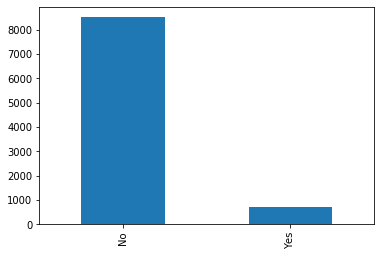

No     9238
Yes       2
Name: Do Not Call, dtype: int64


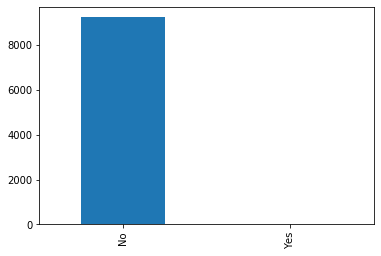

No     9226
Yes      14
Name: Search, dtype: int64


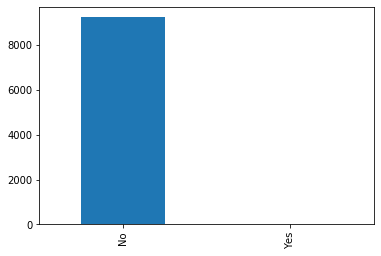

No     9238
Yes       2
Name: Newspaper Article, dtype: int64


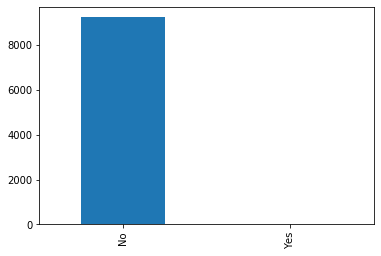

No     9239
Yes       1
Name: X Education Forums, dtype: int64


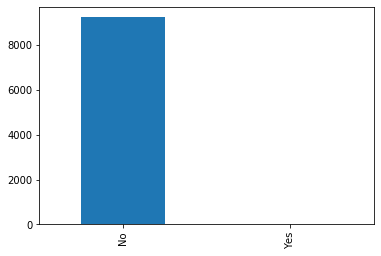

No     9239
Yes       1
Name: Newspaper, dtype: int64


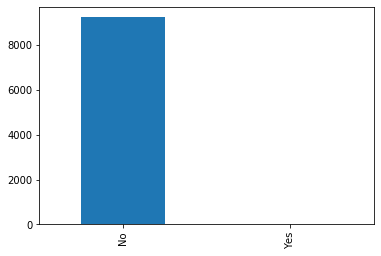

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


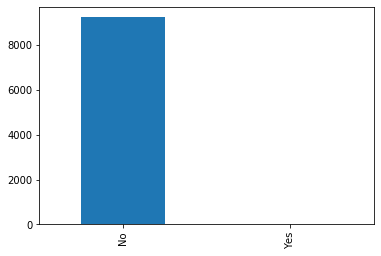

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


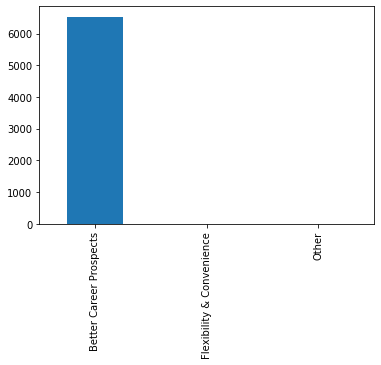

No     9233
Yes       7
Name: Through Recommendations, dtype: int64


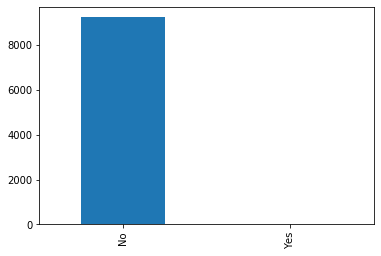

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


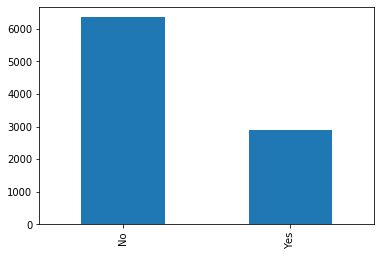

In [14]:
#Checking the Skewness of other columns
#Choosing the columns which has not more than 3 unique values
import matplotlib.pyplot as plt
skew_check = ['Do Not Email','Do Not Call','Search','Newspaper Article','X Education Forums',
              'Newspaper','Digital Advertisement',
              'What matters most to you in choosing a course','Through Recommendations',
              'A free copy of Mastering The Interview']

for i in skew_check:
    print(lead[i].value_counts())
    lead[i].value_counts().plot(kind='bar')
    plt.show()

As seen from above skew check table, the following columns are ***highly skewed (99% threshold)***

1. Do Not Call
2. Search
3. Newspaper Article
4. X Education Forums
5. Newspaper
6. Digital Advertisement
7. What matters most to you in choosing a course
8. Through Recommendations

It is best to drop these columns as they will bias the model

In [15]:
skewed_columns = ['Do Not Call','Search','Newspaper Article','X Education Forums',
              'Newspaper','Digital Advertisement',
              'What matters most to you in choosing a course','Through Recommendations']
lead.drop(skewed_columns,axis=1,inplace=True)

In [16]:
#visualising the data set
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Interested in other courses,NaN,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Ringing,NaN,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [17]:
#Fetching the columns
lead.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Perfoming more data cleaning operations

In [18]:
#Checking the unique values of Lead Origin
lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

As seen we have just one row for Quick Add Form and it is insignificant. Hence dropping that row

In [19]:
#Searching the data frame to find the row which has the value Quick Add Form
lead[lead.eq('Quick Add Form').any(1)]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
2601,634618,Quick Add Form,NaN,Yes,1,NaN,2217,NaN,Email Bounced,NaN,E-COMMERCE,Unemployed,NaN,Other Metro Cities,No,Modified


In [20]:
#Dropping the row index 2601
lead.drop([2601],inplace=True)

In [21]:
#Checking the unique values of Lead Source
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
NC_EDM                  1
welearnblog_Home        1
blog                    1
WeLearn                 1
youtubechannel          1
testone                 1
Name: Lead Source, dtype: int64

In [22]:
#Clubbing all the single digit occurences into 'Others' Category
value_merge1 = ['bing','Click2call','Press_Release','Live Chat','Social Media','testone','Pay per Click Ads','blog',
                'youtubechannel','NC_EDM','WeLearn','welearnblog_Home']
lead['Lead Source'].replace(to_replace = value_merge1,value='Others',inplace=True)

In [23]:
#replacing google with Google
lead['Lead Source'].replace(to_replace = 'google',value='Google',inplace=True)

In [24]:
#Checking the unique values of Lead Source again
lead['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

In [25]:
# Imputing the mode 'Google' for the missing values
lead['Lead Source'].replace(to_replace=np.nan,value='Google',inplace=True)

#### Converting some binary variables (Yes/No) to 1/0

In [26]:
# List of variables to map

varlist =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[varlist] = lead[varlist].apply(binary_map)

In [27]:
#Checking the unique values of Last Activity
lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    325
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [28]:
#Clubbing the values whose count is less than 100 into a single value
value_merge2 = ['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
               'Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow']
lead['Last Activity'].replace(to_replace = value_merge2,value='Others',inplace=True)

In [29]:
#Imputing None in Numerical Columns Total Visits, Page Views Per Visit column with median value
lead['TotalVisits'].fillna((lead['TotalVisits'].median()), inplace=True)
lead['Page Views Per Visit'].fillna((lead['Page Views Per Visit'].median()), inplace=True)

In [30]:
#Imputing missing values in Last Activity Categorical Column with Mode of that column
lead['Last Activity'].replace(to_replace=np.nan,value='Email Opened',inplace=True)

In [31]:
#Imputing any other country apart from India as Others and also replacing null with Mode India
lead['Country'].replace(to_replace=np.nan,value='India',inplace=True)
lead['Country'] = np.where((lead.Country != 'India'),'Others',lead.Country)

***Important Note*** <br>
1. The columns Specilization, What is your current occupation,Tags,City are all Categorical Variables
2. The null values in those categorical variables can be replaced with a string 'Ignorable'
3. When these columns are represented in dummies, the column created for value 'Ignorable' can be dropped

In [32]:
#Given that this column needs to be converted into dummies at later stage , replacing all null values with a string Ignorable, 
#so that this dummy column can be dropped later
lead.Specialization.replace(to_replace=np.nan,value='Ignorable',inplace=True)

In [33]:
lead.Tags.replace(to_replace=np.nan,value='Ignorable',inplace=True)
lead.City.replace(to_replace=np.nan,value='Ignorable',inplace=True)
lead['What is your current occupation'].replace(to_replace=np.nan,value='Ignorable',inplace=True)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [34]:
# Creating a dummy variable for some of the categorical variables
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity', 'Country']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

In [35]:
#Dropping the categorical columns as dummies have been created
lead.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country'],axis=1,inplace=True)

In [36]:
# Creating a dummy variable for some of the categorical variables
dummy2 = pd.get_dummies(lead[['Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy2], axis=1)
lead.drop(['Last Notable Activity'],axis=1,inplace=True)

In [37]:
# Creating  dummy variables for some of the categorical variables whose null values have been replaced with Ignorable
dummy3 = pd.get_dummies(lead[['Specialization','What is your current occupation','Tags','City']])

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy3], axis=1)
lead.drop(['Specialization','What is your current occupation','Tags','City'],axis=1,inplace=True)

In [38]:
#Removing the columns which has Ignorable in it
lead.drop(['Specialization_Ignorable','What is your current occupation_Ignorable',
           'Tags_Ignorable','City_Ignorable'],axis=1,inplace=True)

In [39]:
#Replacing all white spaces in the column names with underscore
lead.columns = lead.columns.str.replace(' ','_')

#### Outlier Treatment

In [40]:
num_lead = lead[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']]
num_lead.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,9239.000000,9239.000000,9239.000000
mean,3.438684,487.511094,2.357479
std,4.819282,547.755682,2.145894
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1379.200000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1839.620000,9.000000


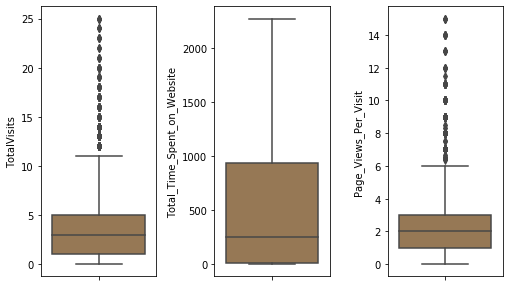

In [166]:
#Box plot to identify Outliers
import seaborn as sns
numeric_variables = ['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']

 #Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=lead)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)

As seen from above table and box plots, both TotalVists and Page_Views_Per_Visit has outliers. Hence it is imperative to treat them

In [57]:
# removing (statistical) outliers for TotalVisits
Q1 = lead.TotalVisits.quantile(0.05)
Q3 = lead.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead.TotalVisits >= Q1 - 1.5*IQR) & (lead.TotalVisits <= Q3 + 1.5*IQR)]

# outlier treatment for Page_Views_Per_Visit
Q1 = lead.Page_Views_Per_Visit.quantile(0.05)
Q3 = lead.Page_Views_Per_Visit.quantile(0.95)
IQR = Q3 - Q1
lead = lead[(lead.Page_Views_Per_Visit >= Q1 - 1.5*IQR) & (lead.Page_Views_Per_Visit <= Q3 + 1.5*IQR)]

In [58]:
#Checking the presentage of missing values again
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead_Number                         0.0
Do_Not_Email                        0.0
Converted                           0.0
TotalVisits                         0.0
Total_Time_Spent_on_Website         0.0
                                   ... 
City_Other_Cities                   0.0
City_Other_Cities_of_Maharashtra    0.0
City_Other_Metro_Cities             0.0
City_Thane_&_Outskirts              0.0
City_Tier_II_Cities                 0.0
Length: 98, dtype: float64

We don't have any missing values in the columns

## Step 3: Data Modelling

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# Dropping target variable from X
X = lead.drop(['Converted','Lead_Number'], axis=1)

In [61]:
# Putting response variable to y
y = lead['Converted']

In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [163]:
type(y_train)

pandas.core.series.Series

### Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

X_train.head()

,Do_Not_Email,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,Lead_Source_Facebook,Lead_Source_Google,...,Tags_number_not_provided,Tags_opp_hangup,Tags_switched_off,Tags_wrong_number_given,City_Mumbai,City_Other_Cities,City_Other_Cities_of_Maharashtra,City_Other_Metro_Cities,City_Thane_&_Outskirts,City_Tier_II_Cities
3070,0,-0.095859,0.052639,-0.660786,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2178,0,0.521104,-0.719130,1.314576,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2925,0,-0.095859,1.256598,-0.166946,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8886,0,-0.404341,1.467245,-0.660786,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7926,0,0.212622,-0.466716,-0.497819,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
### Checking the Converstion Rate
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

38.56507109519158

We have around 38% conversion rate

### Finding Correlations

In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# Let's see the correlation matrix 
lead.corr()

,Lead_Number,Do_Not_Email,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,A_free_copy_of_Mastering_The_Interview,Lead_Origin_Landing_Page_Submission,Lead_Origin_Lead_Add_Form,Lead_Origin_Lead_Import,...,Tags_number_not_provided,Tags_opp_hangup,Tags_switched_off,Tags_wrong_number_given,City_Mumbai,City_Other_Cities,City_Other_Cities_of_Maharashtra,City_Other_Metro_Cities,City_Thane_&_Outskirts,City_Tier_II_Cities
Lead_Number,1.000000,-0.098829,0.025911,0.039797,0.020702,0.058583,-0.110043,-0.074879,0.029475,0.104805,...,-0.008368,-0.026203,-0.003002,-0.013638,-0.035842,0.007201,-0.001936,-0.025100,0.025417,-0.039461
Do_Not_Email,-0.098829,1.000000,-0.135019,-0.002966,-0.047924,0.018193,0.054342,0.093091,-0.019989,-0.017375,...,0.058847,0.002772,0.028294,0.069752,0.028811,0.009861,-0.007044,0.039136,-0.005129,0.046090
Converted,0.025911,-0.135019,1.000000,0.047451,0.362655,-0.001520,-0.039343,-0.049841,0.321710,-0.023768,...,-0.042954,-0.036305,-0.123977,-0.056735,0.031203,0.010725,0.025850,0.008801,0.040644,-0.008839
TotalVisits,0.039797,-0.002966,0.047451,1.000000,0.325650,0.690504,0.278325,0.402357,-0.235106,-0.044066,...,0.001573,0.008721,0.029190,0.026254,0.252365,0.077530,0.052904,0.071670,0.086033,0.021162
Total_Time_Spent_on_Website,0.020702,-0.047924,0.362655,0.325650,1.000000,0.332151,0.170023,0.277483,-0.139851,-0.034967,...,0.002429,-0.008586,-0.027923,-0.013778,0.169333,0.054836,0.066982,0.049556,0.074633,0.020882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_Other_Cities,0.007201,0.009861,0.010725,0.077530,0.054836,0.089938,0.184972,0.174500,-0.049727,0.004962,...,0.015316,0.024643,0.013545,0.002999,-0.206970,1.000000,-0.064571,-0.058611,-0.083931,-0.025463
City_Other_Cities_of_Maharashtra,-0.001936,-0.007044,0.025850,0.052904,0.066982,0.086246,0.109843,0.148518,-0.043876,0.112240,...,-0.003114,-0.005305,0.028656,-0.009316,-0.166908,-0.064571,1.000000,-0.047266,-0.067685,-0.020534
City_Other_Metro_Cities,-0.025100,0.039136,0.008801,0.071670,0.049556,0.100917,0.174251,0.160739,-0.054052,0.005232,...,-0.011229,0.005877,0.000436,0.038866,-0.151500,-0.058611,-0.047266,1.000000,-0.061437,-0.018638
City_Thane_&_Outskirts,0.025417,-0.005129,0.040644,0.086033,0.074633,0.090155,0.046845,0.154336,-0.002942,-0.012650,...,-0.016081,0.002209,0.008980,0.006703,-0.216950,-0.083931,-0.067685,-0.061437,1.000000,-0.026690


### Model Building

In [66]:
#importing statsmodels api
import statsmodels.api as sm

In [67]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           96
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1038.6
Date:                Sun, 19 Apr 2020   Deviance:                       2077.2
Time:                        16:44:42   Pearson chi2:                 1.39e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     20.2146   2.16e+05   9.36e-05      1.000   -4.23e+05    4.23e+05
Do_Not_Email                                              -1.0245      0.338     -3.028      0.002      -1.688      -0.361
TotalVisits                                                0.1858      0.090      2.061      0.039       0.009       0.363
Total_Time_Spent_on_Website                                1.0643      0.069     15.381      0.000       0.929       1.200
Page_Views_Per_Visit                                      -0.1146      0.095     -1.204      0.229      -0.301       0.072
A_free_copy_of_Mastering_The_Interview                    -0.1078      0.204     -0.528      0.597      -0.507       0.292
Lead_Origin_Landing_Page_Submission                       -0.2513      0.275     -0.914      0.361      -0.790       0.288
Lead_Origin_Lead_Add_Form                                  1.2825      0.875      1.467      0.143      -0.432       2.997
Lead_Origin_Lead_Import                                   26.1434   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead_Source_Facebook                                     -26.6644   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead_Source_Google                                         0.2106      0.210      1.005      0.315      -0.200       0.621
Lead_Source_Olark_Chat                                     1.1887      0.277      4.289      0.000       0.645       1.732
Lead_Source_Organic_Search                                 0.1713      0.238      0.720      0.472      -0.295       0.638
Lead_Source_Others                                         1.1223      1.106      1.015      0.310      -1.045       3.290
Lead_Source_Reference                                     -0.5329      0.966     -0.552      0.581      -2.426       1.361
Lead_Source_Referral_Sites                                 0.0030      0.549      0.005      0.996      -1.074       1.080
Lead_Source_Welingak_Website                               3.1086      1.351      2.302      0.021       0.462       5.756
Last_Activity_Email_Bounced                               -0.3978      0.734     -0.542      0.588      -1.836       1.040
Last_Activity_Email_Link_Clicked                           1.6919      0.738      2.293      0.022       0.246       3.138
Last_Activity_Email_Opened                                 0.5830      0.451      1.291      0.197      -0.302       1.468
Last_Activity_Form_Submitted_on_Website                    0.9856      0.678      1.454      0.146      -0.343       2.314
Last_Activity_Olark_Chat_Conversation                      0.0539      0.451      0.119      0.905      -0.831       0.939
Last_Act

### Feature Selection Using RFE

In [68]:
#IMPORT Logistic Regression and instantiate the same
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [69]:
#Importing RFE module from feature_selection class
#Fitting the data into RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [70]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False])

In [71]:
#listing the various features and it's associated ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do_Not_Email', False, 4),
 ('TotalVisits', False, 53),
 ('Total_Time_Spent_on_Website', False, 7),
 ('Page_Views_Per_Visit', False, 55),
 ('A_free_copy_of_Mastering_The_Interview', False, 46),
 ('Lead_Origin_Landing_Page_Submission', False, 23),
 ('Lead_Origin_Lead_Add_Form', False, 5),
 ('Lead_Origin_Lead_Import', False, 76),
 ('Lead_Source_Facebook', False, 20),
 ('Lead_Source_Google', False, 57),
 ('Lead_Source_Olark_Chat', False, 6),
 ('Lead_Source_Organic_Search', False, 67),
 ('Lead_Source_Others', False, 35),
 ('Lead_Source_Reference', False, 19),
 ('Lead_Source_Referral_Sites', False, 41),
 ('Lead_Source_Welingak_Website', True, 1),
 ('Last_Activity_Email_Bounced', False, 34),
 ('Last_Activity_Email_Link_Clicked', False, 18),
 ('Last_Activity_Email_Opened', False, 26),
 ('Last_Activity_Form_Submitted_on_Website', False, 21),
 ('Last_Activity_Olark_Chat_Conversation', False, 36),
 ('Last_Activity_Others', False, 49),
 ('Last_Activity_Page_Visited_on_Website', False, 44),
 ('L

In [72]:
#assigning the results of RFE to DF col
#Eliminating the column whose importance is given as False by RFE
col = X_train.columns[rfe.support_]

In [73]:
X_train.columns[~rfe.support_]

Index(['Do_Not_Email', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'A_free_copy_of_Mastering_The_Interview',
       'Lead_Origin_Landing_Page_Submission', 'Lead_Origin_Lead_Add_Form',
       'Lead_Origin_Lead_Import', 'Lead_Source_Facebook', 'Lead_Source_Google',
       'Lead_Source_Olark_Chat', 'Lead_Source_Organic_Search',
       'Lead_Source_Others', 'Lead_Source_Reference',
       'Lead_Source_Referral_Sites', 'Last_Activity_Email_Bounced',
       'Last_Activity_Email_Link_Clicked', 'Last_Activity_Email_Opened',
       'Last_Activity_Form_Submitted_on_Website',
       'Last_Activity_Olark_Chat_Conversation', 'Last_Activity_Others',
       'Last_Activity_Page_Visited_on_Website', 'Country_Others',
       'Last_Notable_Activity_Email_Bounced',
       'Last_Notable_Activity_Email_Link_Clicked',
       'Last_Notable_Activity_Email_Marked_Spam',
       'Last_Notable_Activity_Email_Opened',
       'Last_Notable_Activity_Email_Received',
       'Last_Notab

#### Manual Iteration No :1

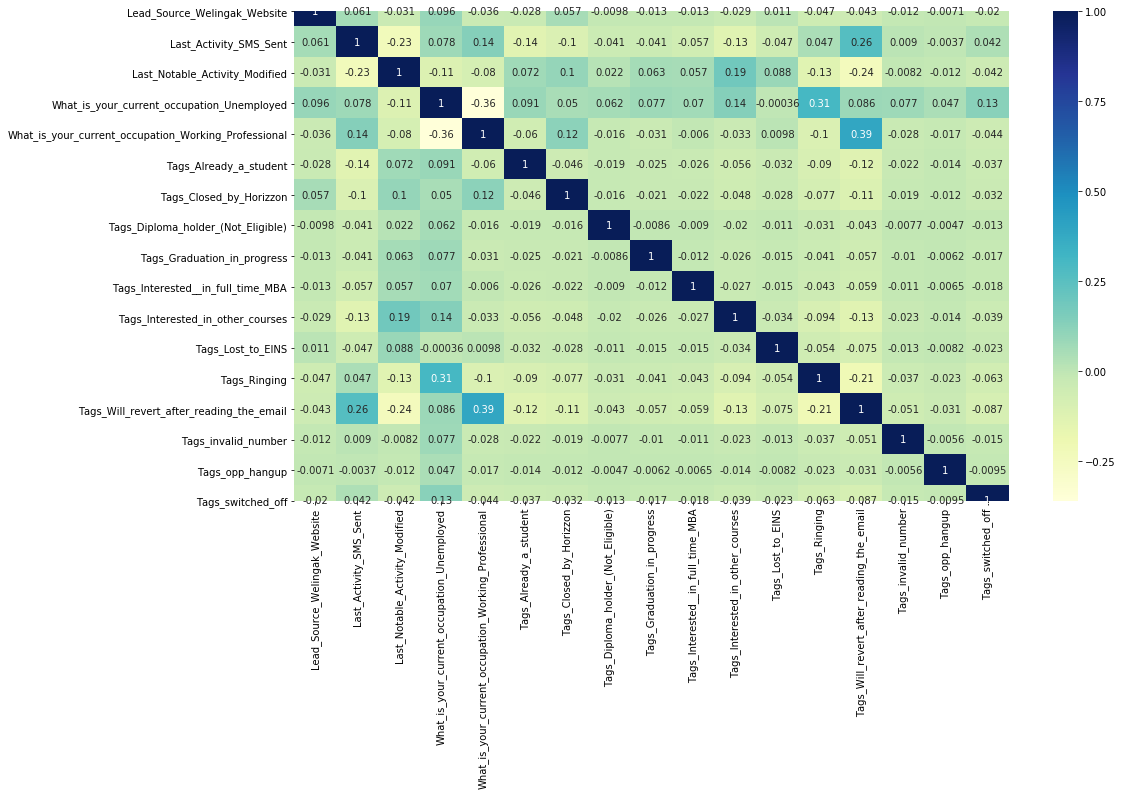

In [109]:
#Finding Correlations
cor = X_train[col].corr()
plt.figure(figsize=(16,9))
sns.heatmap(cor,annot=True,cmap="YlGnBu")

The features selected seems to be less correlated

In [74]:
#Considering only the columns selected by RFE and performing a Generalised linear model on that data set
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6428
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1267.5
Date:                Sun, 19 Apr 2020   Deviance:                       2534.9
Time:                        16:47:26   Pearson chi2:                 8.46e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0908      0.096    -21.848      0.000      -2.278      -1.903
Lead_Source_Welingak_Website                             3.9544      1.030      3.841      0.000       1.937       5.972
Last_Activity_SMS_Sent                                   2.1085      0.117     17.964      0.000       1.878       2.339
Last_Notable_Activity_Modified                          -1.5784      0.124    -12.717      0.000      -1.822      -1.335
What_is_your_current_occupation_Unemployed               2.2137      0.121     18.304      0.000       1.977       2.451
What_is_your_current_occupation_Working_Professional     2.4733      0.363      6.810      0.000       1.761       3.185
Tags_Already_a_student                                  -4.1813      0.590     -7.090      0.000      -5.337      -3.025
Tags_Closed_by_Horizzon                                  6.6743      1.015      6.576      0.000       4.685       8.664
Tags_Diploma_holder_(Not_Eligible)                      -3.6324      1.037     -3.503      0.000      -5.665      -1.600
Tags_Graduation_in_progress                             -2.3362      0.500     -4.671      0.000      -3.317      -1.356
Tags_Interested__in_full_time_MBA                       -2.7943      0.604     -4.624      0.000      -3.979      -1.610
Tags_Interested_in_other_courses                        -3.0331      0.346     -8.766      0.000      -3.711      -2.355
Tags_Lost_to_EINS                                        5.8191      0.610      9.534      0.000       4.623       7.015
Tags_Not_doing_further_education                       -25.1049   1.93e+04     -0.001      0.999   -3.79e+04    3.78e+04
Tags_Ringing                                            -4.6930      0.235    -19.957      0.000      -5.154      -4.232
Tags_Will_revert_after_reading_the_email                 3.4524      0.191     18.053      0.000       3.078       3.827
Tags_invalid_number                                     -5.2860      1.027     -5.145      0.000      -7.300      -3.272
Tags_number_not_provided                               -26.7348   4.56e+04     -0.001      1.000   -8.94e+04    8.93e+04
Tags_opp_hangup                                         -2.6493      0.692     -3.827      0.000      -4.006      -1.292
Tags_switched_off                                       -5.0859      0.527     -9.648      0.000      -6.119      -4.053
Tags_wrong_number_given                                -26.6578   3.79e+04     -0.001      0.999   -7.44e+04    7.43e+04
========================================================================================================================
"""

In [75]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3070    0.530668
2178    0.173534
2925    0.994614
8886    0.983783
7926    0.024861
7679    0.109991
7615    0.010250
2719    0.996611
500     0.017291
8328    0.109991
dtype: float64

In [76]:
#Transposing the y values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.53066764, 0.17353432, 0.99461443, 0.98378265, 0.02486098,
       0.10999054, 0.01024988, 0.9966108 , 0.01729091, 0.10999054])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [77]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['LeadNum'] = y_train.index
y_train_pred_final.head()

,Lead,Lead_Prob,LeadNum
0,1,0.530668,3070
1,0,0.173534,2178
2,1,0.994614,2925
3,1,0.983783,8886
4,0,0.024861,7926


##### Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0

In [78]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead,Lead_Prob,LeadNum,predicted
0,1,0.530668,3070,1
1,0,0.173534,2178,0
2,1,0.994614,2925,1
3,1,0.983783,8886,1
4,0,0.024861,7926,0


In [79]:
#import metrics packahe
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[3683  266]
 [ 187 2313]]


In [80]:
# Predicted     NotLead    HotLead
# Actual
# NotLead        3683      266
# HotLead        187       2313  

In [81]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9297565514033184


***Checking VIF***

In [82]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed_by_Horizzon,1.34
18,Tags_switched_off,1.20
12,Tags_Not_doing_further_education,1.15
9,Tags_Interested__in_full_time_MBA,1.11
11,Tags_Lost_to_EINS,1.10
8,Tags_Graduation_in_progress,1.09
0,Lead_Source_Welingak_Website,1.08
15,Tags_invalid_number,1.07
7,Tags_Diploma_holder_(Not_Eligible),1.06
17,Tags_opp_hangup,1.03


Looks like all the features have VIF within limits. <br> However,the feature Tags_number_not_provided is having very high p value.<br>
Hence dropping the same to see the effect it has on the model.

#### Manual Iteration No :2

In [84]:
col = col.drop('Tags_number_not_provided', 1)

In [85]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1288.3
Date:                Sun, 19 Apr 2020   Deviance:                       2576.6
Time:                        16:50:00   Pearson chi2:                 8.15e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0786      0.095    -21.872      0.000      -2.265      -1.892
Lead_Source_Welingak_Website                             4.0283      1.029      3.916      0.000       2.012       6.045
Last_Activity_SMS_Sent                                   2.0600      0.116     17.832      0.000       1.834       2.286
Last_Notable_Activity_Modified                          -1.5546      0.123    -12.630      0.000      -1.796      -1.313
What_is_your_current_occupation_Unemployed               2.1204      0.119     17.826      0.000       1.887       2.353
What_is_your_current_occupation_Working_Professional     2.4117      0.362      6.656      0.000       1.701       3.122
Tags_Already_a_student                                  -4.1043      0.589     -6.964      0.000      -5.260      -2.949
Tags_Closed_by_Horizzon                                  6.7069      1.014      6.612      0.000       4.719       8.695
Tags_Diploma_holder_(Not_Eligible)                      -3.5450      1.035     -3.424      0.001      -5.574      -1.516
Tags_Graduation_in_progress                             -2.2494      0.499     -4.512      0.000      -3.227      -1.272
Tags_Interested__in_full_time_MBA                       -2.7168      0.604     -4.499      0.000      -3.900      -1.533
Tags_Interested_in_other_courses                        -2.9509      0.345     -8.556      0.000      -3.627      -2.275
Tags_Lost_to_EINS                                        5.8083      0.609      9.535      0.000       4.614       7.002
Tags_Not_doing_further_education                       -25.0206   1.94e+04     -0.001      0.999    -3.8e+04    3.79e+04
Tags_Ringing                                            -4.5735      0.233    -19.626      0.000      -5.030      -4.117
Tags_Will_revert_after_reading_the_email                 3.5028      0.190     18.424      0.000       3.130       3.875
Tags_invalid_number                                     -5.1641      1.027     -5.030      0.000      -7.176      -3.152
Tags_opp_hangup                                         -2.5409      0.689     -3.687      0.000      -3.892      -1.190
Tags_switched_off                                       -4.9630      0.526     -9.434      0.000      -5.994      -3.932
Tags_wrong_number_given                                -26.5386    3.8e+04     -0.001      0.999   -7.46e+04    7.45e+04
========================================================================================================================
"""

In [86]:
#Transposing the y values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.51043008, 0.1717639 , 0.99448086, 0.98287504, 0.02575057,
       0.11119175, 0.01064723, 0.99633235, 0.01752747, 0.11119175])

In [87]:
y_train_pred_final['Lead_Prob'] = y_train_pred

In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead,Lead_Prob,LeadNum,predicted
0,1,0.510430,3070,1
1,0,0.171764,2178,0
2,1,0.994481,2925,1
3,1,0.982875,8886,1
4,0,0.025751,7926,0


In [89]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9202977205768336


The overall accuracy hasn't dropped much.

In [90]:
# Checking VIF Again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed_by_Horizzon,1.34
17,Tags_switched_off,1.19
12,Tags_Not_doing_further_education,1.14
9,Tags_Interested__in_full_time_MBA,1.10
11,Tags_Lost_to_EINS,1.09
8,Tags_Graduation_in_progress,1.09
0,Lead_Source_Welingak_Website,1.08
15,Tags_invalid_number,1.07
7,Tags_Diploma_holder_(Not_Eligible),1.06
16,Tags_opp_hangup,1.03


It is evident from above table, that VIF is well under limits

#### Manual Iteration No:3

In [91]:
#dropping feature Tags_Not_doing_further_education as it has very high P-Value
col = col.drop('Tags_Not_doing_further_education', 1)

In [92]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm31 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm31.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6430
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1328.7
Date:                Sun, 19 Apr 2020   Deviance:                       2657.4
Time:                        16:51:39   Pearson chi2:                 8.36e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0927      0.095    -22.006      0.000      -2.279      -1.906
Lead_Source_Welingak_Website                             4.3085      1.030      4.183      0.000       2.290       6.327
Last_Activity_SMS_Sent                                   2.1198      0.114     18.654      0.000       1.897       2.343
Last_Notable_Activity_Modified                          -1.6477      0.121    -13.634      0.000      -1.885      -1.411
What_is_your_current_occupation_Unemployed               1.8974      0.115     16.460      0.000       1.671       2.123
What_is_your_current_occupation_Working_Professional     2.2187      0.356      6.238      0.000       1.522       2.916
Tags_Already_a_student                                  -3.8568      0.588     -6.554      0.000      -5.010      -2.703
Tags_Closed_by_Horizzon                                  6.9704      1.013      6.881      0.000       4.985       8.956
Tags_Diploma_holder_(Not_Eligible)                      -3.3048      1.037     -3.187      0.001      -5.337      -1.273
Tags_Graduation_in_progress                             -1.9953      0.499     -3.996      0.000      -2.974      -1.017
Tags_Interested__in_full_time_MBA                       -2.4575      0.603     -4.073      0.000      -3.640      -1.275
Tags_Interested_in_other_courses                        -2.6953      0.344     -7.828      0.000      -3.370      -2.020
Tags_Lost_to_EINS                                        5.9574      0.608      9.805      0.000       4.766       7.148
Tags_Ringing                                            -4.3824      0.231    -18.976      0.000      -4.835      -3.930
Tags_Will_revert_after_reading_the_email                 3.7297      0.189     19.763      0.000       3.360       4.100
Tags_invalid_number                                     -4.9755      1.027     -4.846      0.000      -6.988      -2.963
Tags_opp_hangup                                         -2.3322      0.692     -3.368      0.001      -3.689      -0.975
Tags_switched_off                                       -4.7761      0.525     -9.093      0.000      -5.806      -3.747
Tags_wrong_number_given                                -24.3338   1.39e+04     -0.002      0.999   -2.72e+04    2.72e+04
========================================================================================================================
"""

In [93]:
#Transposing the y values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.45133964, 0.1651338 , 0.99410368, 0.98213033, 0.02319566,
       0.10981268, 0.01017421, 0.99650975, 0.01621401, 0.10981268])

In [94]:
y_train_pred_final['Lead_Prob'] = y_train_pred

In [95]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead,Lead_Prob,LeadNum,predicted
0,1,0.451340,3070,0
1,0,0.165134,2178,0
2,1,0.994104,2925,1
3,1,0.982130,8886,1
4,0,0.023196,7926,0


In [96]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9199875949759653


For this iteration as well, the accuracy hasn't dropped much

In [97]:
# Checking VIF Again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed_by_Horizzon,1.30
16,Tags_switched_off,1.17
9,Tags_Interested__in_full_time_MBA,1.09
11,Tags_Lost_to_EINS,1.08
8,Tags_Graduation_in_progress,1.08
0,Lead_Source_Welingak_Website,1.07
14,Tags_invalid_number,1.06
7,Tags_Diploma_holder_(Not_Eligible),1.05
17,Tags_wrong_number_given,1.03
15,Tags_opp_hangup,1.02


The VIF is under limits

#### Manual Iteration No: 4

In [98]:
#dropping feature Tags_wrong_number_given as it has very high P-Value
col = col.drop('Tags_wrong_number_given', 1)

In [99]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6431
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1353.1
Date:                Sun, 19 Apr 2020   Deviance:                       2706.2
Time:                        16:52:59   Pearson chi2:                 8.05e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0718      0.094    -22.001      0.000      -2.256      -1.887
Lead_Source_Welingak_Website                             4.3864      1.029      4.262      0.000       2.369       6.404
Last_Activity_SMS_Sent                                   2.0557      0.111     18.441      0.000       1.837       2.274
Last_Notable_Activity_Modified                          -1.6306      0.120    -13.601      0.000      -1.866      -1.396
What_is_your_current_occupation_Unemployed               1.7965      0.113     15.847      0.000       1.574       2.019
What_is_your_current_occupation_Working_Professional     2.1522      0.355      6.061      0.000       1.456       2.848
Tags_Already_a_student                                  -3.7790      0.588     -6.424      0.000      -4.932      -2.626
Tags_Closed_by_Horizzon                                  7.0106      1.012      6.925      0.000       5.026       8.995
Tags_Diploma_holder_(Not_Eligible)                      -3.2131      1.035     -3.104      0.002      -5.242      -1.184
Tags_Graduation_in_progress                             -1.9018      0.497     -3.823      0.000      -2.877      -0.927
Tags_Interested__in_full_time_MBA                       -2.3763      0.603     -3.942      0.000      -3.558      -1.195
Tags_Interested_in_other_courses                        -2.6078      0.343     -7.599      0.000      -3.280      -1.935
Tags_Lost_to_EINS                                        5.9512      0.606      9.814      0.000       4.763       7.140
Tags_Ringing                                            -4.2509      0.229    -18.584      0.000      -4.699      -3.803
Tags_Will_revert_after_reading_the_email                 3.7841      0.188     20.150      0.000       3.416       4.152
Tags_invalid_number                                     -4.8410      1.026     -4.719      0.000      -6.851      -2.830
Tags_opp_hangup                                         -2.2148      0.689     -3.217      0.001      -3.564      -0.865
Tags_switched_off                                       -4.6404      0.524     -8.854      0.000      -5.668      -3.613
========================================================================================================================
"""

The P-Value of all the features are within limits

In [100]:
#Transposing the y values
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.43162533, 0.16155224, 0.99396911, 0.98080821, 0.02407117,
       0.11187156, 0.01070682, 0.99618314, 0.01628537, 0.11187156])

In [101]:
y_train_pred_final['Lead_Prob'] = y_train_pred

In [102]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead,Lead_Prob,LeadNum,predicted
0,1,0.431625,3070,0
1,0,0.161552,2178,0
2,1,0.993969,2925,1
3,1,0.980808,8886,1
4,0,0.024071,7926,0


In [103]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.9113040781516514


The accuracy is almost intact

In [104]:
# Checking VIF Again
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed_by_Horizzon,1.29
16,Tags_switched_off,1.17
9,Tags_Interested__in_full_time_MBA,1.09
11,Tags_Lost_to_EINS,1.08
8,Tags_Graduation_in_progress,1.08
0,Lead_Source_Welingak_Website,1.07
14,Tags_invalid_number,1.06
7,Tags_Diploma_holder_(Not_Eligible),1.05
15,Tags_opp_hangup,1.02
4,What_is_your_current_occupation_Working_Profes...,0.91


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [105]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
confusion

array([[3825,  124],
       [ 448, 2052]], dtype=int64)

In [106]:
# Predicted     NotLead    HotLead
# Actual
# NotLead        3825      124
# HotLead        448       2052 

In [107]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.9113040781516514

## Step 4: Metrics beyond simply accuracy

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
'The sensitivity is '+str(TP / float(TP+FN))

'The sensitivity is 0.8208'

In [114]:
# Let us calculate specificity
'The specificity is '+str(TN / float(TN+FP))

'The specificity is 0.9685996454798683'

In [115]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.03140035452013168


In [116]:
# positive predictive value 
print (TP / float(TP+FP))

0.9430147058823529


In [117]:
# Negative predictive value
print (TN / float(TN+ FN))

0.895155628364147


### Plotting ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for Lead Scoring')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

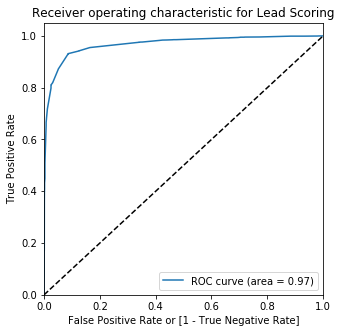

In [120]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

### Finding Optimal Threshold Point

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead,Lead_Prob,LeadNum,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.431625,3070,0,1,1,1,1,1,0,0,0,0,0
1,0,0.161552,2178,0,1,1,0,0,0,0,0,0,0,0
2,1,0.993969,2925,1,1,1,1,1,1,1,1,1,1,1
3,1,0.980808,8886,1,1,1,1,1,1,1,1,1,1,1
4,0,0.024071,7926,0,1,0,0,0,0,0,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy   sensi     speci
0.0   0.0  0.387657  1.0000  0.000000
0.1   0.1  0.778415  0.9764  0.653077
0.2   0.2  0.920763  0.9312  0.914155
0.3   0.3  0.920763  0.9312  0.914155
0.4   0.4  0.920298  0.9284  0.915168
0.5   0.5  0.911304  0.8208  0.968600
0.6   0.6  0.911459  0.8112  0.974930
0.7   0.7  0.911614  0.8112  0.975184
0.8   0.8  0.911614  0.8112  0.975184
0.9   0.9  0.870523  0.6796  0.991390


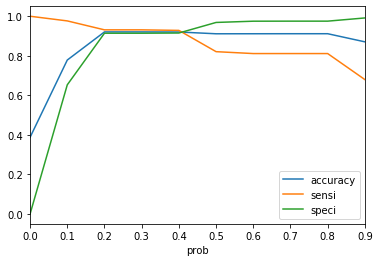

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

***As the sensitivity, specificity and accuracy intersects from x: 0.2 to x:0.4, we are choosing 0.3 as optimal cutoff point***

In [125]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Lead,Lead_Prob,LeadNum,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.431625,3070,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.161552,2178,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.993969,2925,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.980808,8886,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.024071,7926,0,1,0,0,0,0,0,0,0,0,0,0


In [126]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.9207629089781362

In [127]:
#Recomputing confusion metrics again based on optimal cutoff
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[3610,  339],
       [ 172, 2328]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9312

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.9141554824006077

In [131]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.08584451759939225


In [132]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8728908886389202


In [133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9545214172395557


In [134]:
#To calculate Precision, looking at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
'Precision is '+str(confusion[1,1]/(confusion[0,1]+confusion[1,1]))

'Precision is 0.9430147058823529'

In [135]:
'Recall is '+str(confusion[1,1]/(confusion[1,0]+confusion[1,1]))

'Recall is 0.8208'

In [136]:
#importing precision and recall score from sklearn package
from sklearn.metrics import precision_score, recall_score

In [137]:
precision_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.9430147058823529

In [138]:
recall_score(y_train_pred_final.Lead, y_train_pred_final.predicted)

0.8208

### Precision and Recall TradeOff

In [139]:
#importing precision recall curve from sklearn
from sklearn.metrics import precision_recall_curve

In [140]:
#setting parameters for plotting precision recall curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

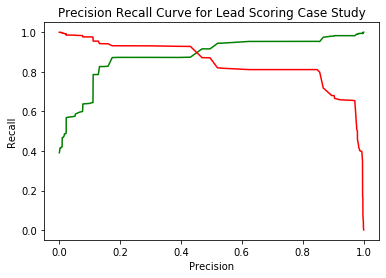

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.xlabel('Precision')
plt.plot(thresholds, r[:-1], "r-")
plt.ylabel('Recall')
plt.title('Precision Recall Curve for Lead Scoring Case Study')
plt.show()

### Making predictions on the test set

In [142]:
#Scaling the test data set and considering only the same features as that of final train model
X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.transform(X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

X_test = X_test[col]
X_test.head()

,Lead_Source_Welingak_Website,Last_Activity_SMS_Sent,Last_Notable_Activity_Modified,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working_Professional,Tags_Already_a_student,Tags_Closed_by_Horizzon,Tags_Diploma_holder_(Not_Eligible),Tags_Graduation_in_progress,Tags_Interested__in_full_time_MBA,Tags_Interested_in_other_courses,Tags_Lost_to_EINS,Tags_Ringing,Tags_Will_revert_after_reading_the_email,Tags_invalid_number,Tags_opp_hangup,Tags_switched_off
2730,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
5463,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6476,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8754,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [143]:
#Add constant to test set and making predictions on test set
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [144]:
# Converting y_pred to a dataframe which is an array and reading the data set
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2730,0.010707
5463,0.431625
6476,0.010707
4136,0.111872
8754,0.077955


In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [146]:
# Putting LeadNum to index
y_test_df['LeadNum'] = y_test_df.index

In [147]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [148]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [149]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})

In [150]:
#Based on the precision recall curve, the optimal point is chosen as 0.42, hence using the same to predict on test data set
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [151]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9178726483357453

In [152]:
#computing the confusion matrix for predicted test set
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1551,  160],
       [  67,  986]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.936372269705603

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.9064874342489772

In [157]:
'The F1_score of the predicted model is '+str(metrics.f1_score(y_pred_final.Converted, y_pred_final.final_predicted))

'The F1_score of the predicted model is 0.8967712596634834'

### ROC Curve for Test Data

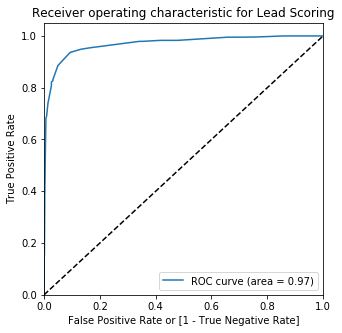

In [158]:
draw_roc(y_pred_final.Converted, y_pred_final.Lead_Prob)

1. The model is behaving good for both train and test data sets.
2. Accuracy, Sensitivity, F-Score are good and is in par with best possible results


In [159]:
#Selecting the coefficients of the selected features from our final model excluding the intercept
pd.options.display.float_format = '{:.2f}'.format
value=res.params[1:].sort_values(ascending=False)

In [160]:
#showing the results in pandas series as well
value

Tags_Closed_by_Horizzon                                 7.01
Tags_Lost_to_EINS                                       5.95
Lead_Source_Welingak_Website                            4.39
Tags_Will_revert_after_reading_the_email                3.78
What_is_your_current_occupation_Working_Professional    2.15
Last_Activity_SMS_Sent                                  2.06
What_is_your_current_occupation_Unemployed              1.80
Last_Notable_Activity_Modified                         -1.63
Tags_Graduation_in_progress                            -1.90
Tags_opp_hangup                                        -2.21
Tags_Interested__in_full_time_MBA                      -2.38
Tags_Interested_in_other_courses                       -2.61
Tags_Diploma_holder_(Not_Eligible)                     -3.21
Tags_Already_a_student                                 -3.78
Tags_Ringing                                           -4.25
Tags_switched_off                                      -4.64
Tags_invalid_number     

Text(0.5, 1.0, 'Features identifed for Lead Scoring Case Study')

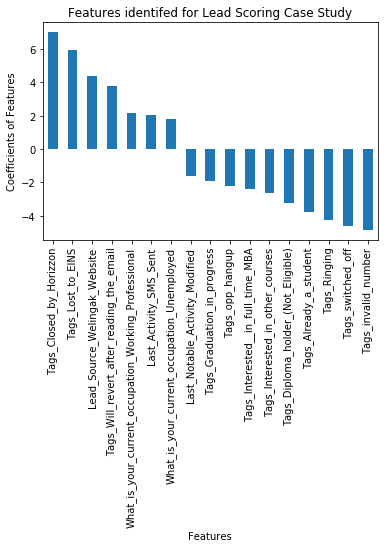

In [161]:
value.plot.bar()
plt.xlabel('Features')
plt.ylabel('Coefficients of Features')
plt.title('Features identifed for Lead Scoring Case Study')

#### Insights

1. As seen from the bar plot, Tags_Closed_by_Horizzon feature has highest conversion rate
2. It is followed by Tags_Lost_to_EINS
3. Lead_Source_Welingak_Website contributes the next most to the successfull conversion rate
4. On the other hand, whoever provided an invalid number, they tend to never convert into a student.
5. Most of the respondents whose contact number is invalid or the phone is switched off or never take a ring, may not be converted. So the X Education marketing representatives ```should not``` call these respondents more than once, which results in better focus on others
6. Instead they should focus more on people, who report 'Closed by Horizzon' or 'Lost to EINS' for better converstion rate.
7. They can also promote the Welingak Website on various platforms including Social media, which will significantly increase their conversion rate